# Acceso a los datos de la imagen


In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


In [2]:
img = cv.imread('imgBloque1.bmp')

# Muestro información de la imagen cargada
print('Estructura de la imagen: {}'.format(img.shape))
print('Cantidad total de pixeles: {}'.format(img.size))
print('Tipo de dato de cada pixel: {}'.format(img.dtype))

if len(img.shape)==3:
    print('Imagen COLOR')
else:
    print('Imagen BW')
    

Estructura de la imagen: (480, 640, 3)
Cantidad total de pixeles: 921600
Tipo de dato de cada pixel: uint8
Imagen COLOR


In [3]:
u = 150
v = 300
pix = img[u,v,:]
print('Color del pixel [{},{}] = {}'.format(u,v,pix))
img[u,v,0] = 10
print('Luego de cambiar el azul a 10 = {}'.format(pix))

Color del pixel [150,300] = [160 192 192]
Luego de cambiar el azul a 10 = [ 10 192 192]


ROI: Region of Interest (Region de Interes)

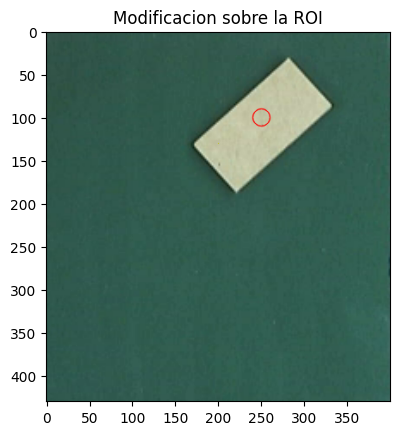

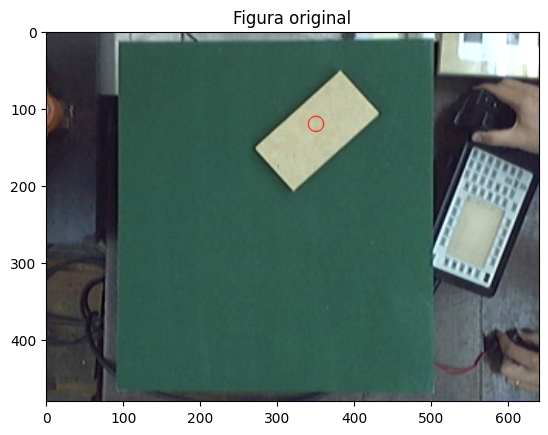

In [4]:
# ROI
img_roi = img[20:450, 100:500,:]

# Modifiquemos la imagen de la zona de interés
cv.circle(img_roi, (250, 100), 10, (0, 0, 255), 1 , cv.LINE_AA)
plt.figure(1)
plt.imshow(img_roi[:,:,::-1])
plt.title('Modificacion sobre la ROI')

# Qué habrá pasado con la imagen original ??
plt.figure(2)
plt.imshow(img[:,:,::-1])
plt.title('Figura original')
plt.show()

Tamaño de las imagenes con borde (560, 720)


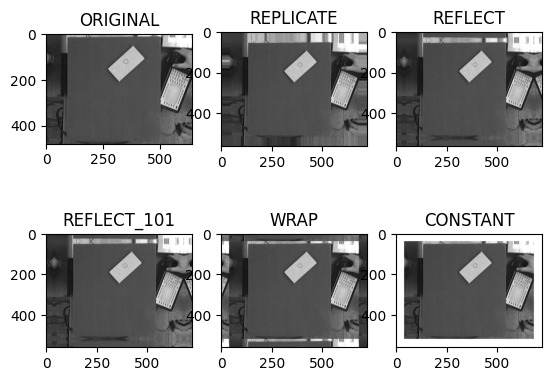

In [5]:
# Padding
# Es un recuadro que agregamos a la imagen. Se aplica en filtros convolucionales y en la mayoria de los modelos de deep learning
a = 40
img1 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
replicate = cv.copyMakeBorder(img1, a, a, a, a, cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1, a, a, a, a, cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1, a, a, a, a, cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1, a, a, a, a, cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1, a, a, a, a, cv.BORDER_CONSTANT, value=255)

print('Tamaño de las imagenes con borde {}'.format(replicate.shape))

plt.close(3)
plt.figure(3)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()